<a href="https://colab.research.google.com/github/helah20/Machine_learning/blob/main/Copy_of_01_case_study_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Week 1 Case Study
[Customer churn](https://en.wikipedia.org/wiki/Churn_rate) - Predict customer retention. 

### Data
- [churn_data.csv](https://raw.githubusercontent.com/gumdropsteve/intro_to_machine_learning/main/day_05/data/churn_data.csv)
- [Data Dictionary](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)

### Deleverables
1. Analysis of customer data
    - EDA, data viz, etc...
2. Model to predict churn 
    - Classification - LogisticRegression
    - How good is you model?
        - precision, recall, etc...
    - What are the best params?
        - GridSearchCV, etc...
3. Ideas for customer retention programs

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression      # 1. choose model class
import numpy as np 
import seaborn as sns
from sklearn.metrics import*
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'

df = pd.read_csv(raw_link)


# **Understanding data**

In [438]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No


In [439]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [440]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No
6337,1775-KWJKQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.9,No


In [441]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4503,4403-BWPAY,Male,0,No,No,14,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),24.8,321.7,No


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [443]:
df.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338
unique,6338,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5921,2
top,7089-IVVAZ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3197,3267,4435,5717,3047,2796,3155,2804,2785,3126,2529,2517,3503,3769,2150,11,4650


In [444]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [445]:
df.shape

(6338, 21)

#***Visualizing the dataset***

In [446]:
df.SeniorCitizen.value_counts() # the  young castomers  more than the Senior Citizen

0    5313
1    1025
Name: SeniorCitizen, dtype: int64

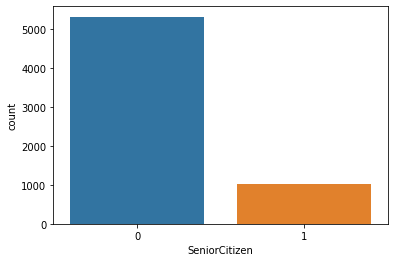

In [447]:
sns.countplot(data=df, x="SeniorCitizen") # Show the number of SeniorCitizen  


In [448]:
df.Churn.value_counts() # the count of the customers who stayed with the company -> 1 or not -> 0


No     4650
Yes    1688
Name: Churn, dtype: int64

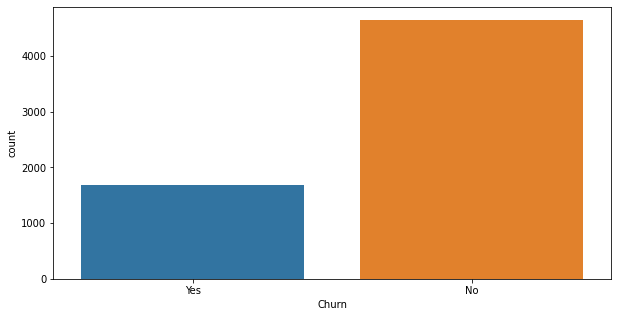

In [449]:

plt.figure( figsize=[10,5] )
sns.countplot(x='Churn' ,data= df)

In [450]:
df.gender.value_counts() ,

(Male      3197
 Female    3141
 Name: gender, dtype: int64,)

# **Data Wrangling:**

In [451]:
df.drop(df.loc[df['TotalCharges']==' '].index, inplace=True)

In [452]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [453]:
# train["Churn"] = train["Churn"].replace({'Yes':1,'No':0})
df["Churn"] = df["Churn"].replace({'Yes':1,'No':0})



In [454]:
df["gender"]=df["gender"].replace({'Female':1,'Male':0})

In [455]:
dum=pd.get_dummies(df.iloc[:,1:20])
dum

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,18,39.05,669.85,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0,66,19.95,1269.10,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,0,39,99.95,3767.40,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,0,0,10,95.25,1021.55,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,1,0,27,56.70,1652.95,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,0,36,95.00,3440.25,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
6334,1,0,2,80.45,137.10,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6335,0,0,72,118.20,8547.15,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
6336,0,1,68,84.65,5683.60,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


# **preparing the data for ML**

In [456]:
# defind the target and the input data from featur engeneer 
X = dum
y = df.Churn.astype('int')
 # split the data  into train set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=7)



## Setting up a simple Logistic Regression
[Sklearn docs - LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## **LogisticRegression Model**

In [457]:
lr = LogisticRegression()                             # 2. instantiate model

Define a very simple `X` and `y`...

- `X` is / are your varible(s) that will help predict `y`
- `y` is your "target" (what you're trying to predict)

In [458]:
lr.fit(X_train, y_train)                             # 3. fit model to data

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [459]:
y_model = lr.predict(X_test)                         # 4. predict on new data

In [460]:
preds = lr.predict(pd.DataFrame(X_test)) 
preds

array([0, 0, 0, ..., 0, 0, 0])

we can use the accuracy_score utility to see the fraction of predicted labels that match their true value

we see that With an accuracy topping 80%, so the classification algorithm is effective for this particular dataset!

In [461]:
accuracy_score( y_test,y_model) # calculates precision 

0.8029225908372828

In [462]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y_test, y_pred=y_model) # we can see the square error is 19%

0.1970774091627172

In [463]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(**kwargs))

In [464]:
def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))
param_grid = {'logisticregression__dual': [True, False],
              'logisticregression__multi_class': ['auto']}

grid = GridSearchCV(LR(), param_grid, cv=7)

In [465]:
grid.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [466]:
grid.best_params_

{'logisticregression__dual': False, 'logisticregression__multi_class': 'auto'}

## **Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)**

In [467]:
lr = LogisticRegression(dual=False ,
                        multi_class='auto'
                        )

In [468]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [469]:

preds = lr.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [470]:
accuracy_score( y_test,y_model) # calculates precision 

0.8029225908372828

In [471]:
mean_squared_error(y_true=y_test, y_pred=y_model) # we can see the square error is 19%

0.1970774091627172

# **Gaussian naive Bayes model:**
 
 **Classification on digits**

 Let's apply a classification algorithm to the digits



In [472]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [473]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)   # 75% accuracy for classification of the digits! 

0.7037914691943128

In [474]:
mean_squared_error(y_true=y_test, y_pred=y_model) # we can see the square error is 19%

0.2962085308056872

the number doesn't tell us where we've gone wrong—one

there is a nice way to do this is to use the **confusion matrix**, which we can compute with Scikit-Learn and plot with Seaborn

Text(91.68, 0.5, 'true value')

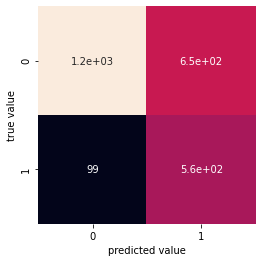

In [475]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')


This shows us where the mis-labeled points tend to be: 
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels:

# **KNeighborsClassifier Model**

In [476]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [477]:

knn.fit(X, y)
y_model = knn.predict(X)



In [478]:
accuracy_score(y, y_model) #baad model

0.9977883096366509

In [479]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(**kwargs))

In [480]:
def KNN(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))
param_grid = {'logisticregression__dual': [True, False],
              'logisticregression__multi_class': ['auto']}

grid = GridSearchCV(LR(), param_grid, cv=7)

In [481]:
grid.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [482]:
grid.best_params_

{'logisticregression__dual': False, 'logisticregression__multi_class': 'auto'}

## **Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)**

In [483]:
knn = KNN(dual=False ,
         multi_class='auto'
                        )

In [484]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [485]:
preds = knn.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [486]:
# accuracy_score( y_test,y_model) 

**Model validation the right way:**

In [487]:
from sklearn.model_selection import train_test_split

# fit the model on one set of data
knn.fit(X_train, y_train)

# evaluate the model on the second set of data
y2_model = knn.predict(X_test)
accuracy_score(y_test, y2_model)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8029225908372828

In [488]:
y2_model = model.fit(X_train, y_train).predict(X_test)
y1_model = model.fit(X_test, y_test).predict(X_train)
accuracy_score(y_train, y1_model), accuracy_score(y_test, y2_model)

(0.688783570300158, 0.7037914691943128)

In [489]:
cross_val_score(knn, X, y, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.8056872 , 0.79936809, 0.81595577, 0.80173776, 0.79541864])